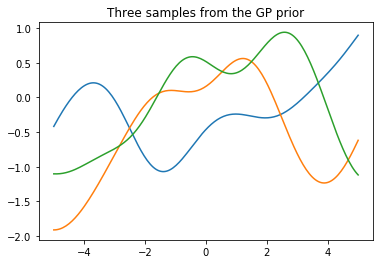

In [8]:
#Question 13
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# create data
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)
# compute covariance matrix
K = np.exp(-cdist(x,x)**2/5)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,3)
# plot the data
plt.plot(x,f.T)
plt.title('Three samples from the GP prior')
plt.show()

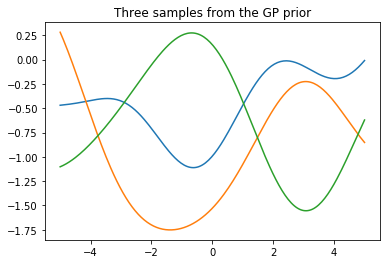

In [2]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# create data
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)
# compute covariance matrix
K = np.exp(-cdist(x,x)**2/10)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,3)
# plot the data
plt.plot(x,f.T)
plt.title('Three samples from the GP prior')
plt.show()

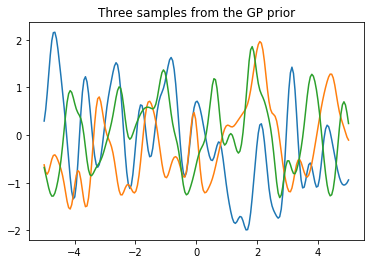

In [3]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
# create data
x = np.linspace(-5,5,200)
x = x.reshape(-1,1)
mu = np.zeros(x.shape)
# compute covariance matrix
K = np.exp(-cdist(x,x)**2/0.1)
# now we have the mean function and the covariance function # the GP is fully described
f = np.random.multivariate_normal(mu.flatten(),K,3)
# plot the data
plt.plot(x,f.T)
plt.title('Three samples from the GP prior')
plt.show()

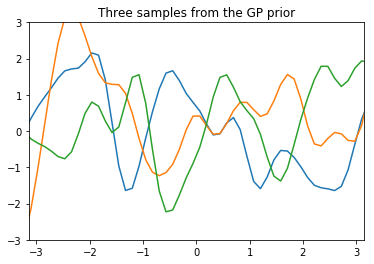

In [4]:
#Question 14
import numpy as np
import matplotlib.pyplot as plt

# Test data
n = 80
#Xtest = np.linspace(-5, 5, n).reshape(-1,1)
Xtest = np.linspace(-5,5,n).reshape(-1,1)

# Define the kernel function
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T)
    return np.exp(-.5 * (1/param) * sqdist)

param = 0.1
K_ss = kernel(Xtest, Xtest, param)

# Get cholesky decomposition (square root) of the
# covariance matrix
L = np.linalg.cholesky(K_ss + 1e-15*np.eye(n))
# Sample 3 sets of standard normals for our test points,
# multiply them by the square root of the covariance matrix
f_prior = np.dot(L, np.random.normal(size=(n,3)))

# Now let's plot the 3 sampled functions.
plt.plot(Xtest, f_prior)
plt.axis([-np.pi, np.pi, -3, 3])
plt.title('Three samples from the GP prior')
plt.show()

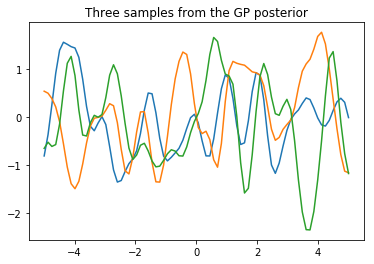

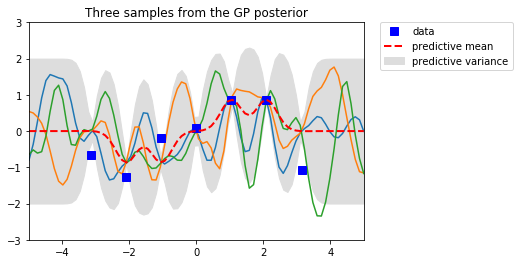

In [5]:
#Question 14
# Noisy training data
Xtrain = np.linspace(-np.pi,np.pi,7).reshape(-1,1)
e = np.random.normal(0, 0.5, 7).reshape(-1,1)
ytrain = np.sin(Xtrain)
ynoise = np.sin(Xtrain) + e

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)
# Draw samples from the posterior at our test points.
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,3)))

fig1 = plt.figure()
plt.plot(Xtest, f_post)
plt.title('Three samples from the GP posterior')

fig2 = plt.figure()
plt.plot(Xtest, f_post)
plt.plot(Xtrain, ynoise, 'bs', ms=8, label="data")
plt.gca().fill_between(Xtest.flatten(), mu-2*stdv, mu+2*stdv, color="#dddddd",label="predictive variance")
plt.plot(Xtest, mu, 'r--', lw=2, label='predictive mean')
plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

         Current function value: -2724.197692
         Iterations: 0
         Function evaluations: 105
         Gradient evaluations: 93


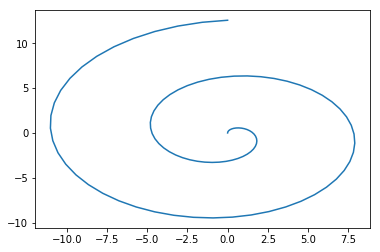

In [6]:
#Question 21
import numpy as np
import scipy as sp
import scipy.optimize as opt
import math
import matplotlib.pyplot as plt
def f(x,*args):
    # return the value of the objective at x 
    mu, sigma, A=args
    N=100
    D=10
    xvalues = np.array([x*np.sin(x),x*np.cos(x)])
    Y = np.matmul(xvalues.T,A.T)
    C = np.matmul(A,A.T) + sigma**2*np.eye(10)
    d = np.matmul(np.linalg.inv(C),Y.T)
    val = -N/D*math.log(2*np.pi) - N/2*math.log(np.linalg.det(C)) - 1/2*np.trace(np.matmul(Y,d))
    return val


def dfx(x,*args):
    # return the gradient of the objective at x 
    mu, sigma, A = args
    xvalues = np.array([x*np.sin(x),x*np.cos(x)])
    Y = np.matmul(xvalues.T,A.T)
    C = np.matmul(A,A.T) + sigma**2*np.eye(10)
    dcdA = np.zeros([10,10])
    for i in range(11):
        for j in range(3):
            Jij = np.zeros([10,2])
            Jij[i-1,j-1]=1
            dcdA = dcdA + np.matmul(A,Jij.T) + np.matmul(Jij,A.T)
    der1 = np.trace(np.matmul(np.linalg.inv(C), dcdA))
    d = np.matmul(-np.linalg.inv(C),np.matmul(dcdA,np.linalg.inv(C)))
    der2 = np.trace(np.matmul(np.matmul(Y.T,Y),d))
    val = der1 + der2
    return val


x = np.linspace(0,4*np.pi,100)
mu=0
sigma=1
a=np.random.normal(0,1,20)
A=a.flatten().reshape(10,2)
args=(mu,sigma,A)
xstar = opt.fmin_cg(f,x,fprime=dfx,args=args)       
def fnonlin(x):
    f_nl =  np.transpose([x*np.sin(x),x*np.cos(x)])
    return f_nl

fnl=fnonlin(xstar)
                    
plt.plot(fnl[:,0],fnl[:,1])
plt.show()                      

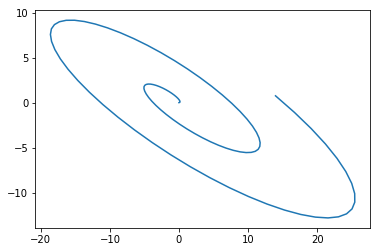

In [7]:
#Question 22
#get 10D and map to 2D
def flin(x,mu,sigma):
    a=np.random.normal(0,1,20)
    A=a.flatten().reshape(10,2)
    fnl = np.array([x*np.sin(x),x*np.cos(x)])
    f_lin=np.matmul(fnl.T,A.T)
    return f_lin
mu=0
sigma=1
f_lin=flin(xstar,mu,sigma)

xval=np.matmul(f_lin,A)
plt.plot(xval[:,0],xval[:,1])
plt.show()
